In [12]:
import numpy as np
from scipy.signal import convolve2d

#дополнение множества
def complement(f):
    return 1 - f

#расширение множества через свёртку
def dilation(a, b):
    a = np.ndarray.astype(a, np.int32)
    b = np.ndarray.astype(b, np.int32)
    return convolve2d(a, b, 'same') > 0

#эррозия множества
def erosion(a, b):
    return complement(dilation(complement(a), b))

#отмыкание
def opening(a, b):
    return dilation(erosion(a, b), b)

#замыкание
def closing(a, b):
    return erosion(dilation(a, b), b)

def is_empty(a):
    return np.all(a == 0)

In [13]:
#Алгоритм построения скелета
def build_skelet(x, b):
    skelet = []
    y = erosion(x, b)
    while not is_empty(y):
        skelet.append(np.logical_xor(x, dilation(y, b)))
        x = y
        y = erosion(x, b)
    skelet.append(x)
    return skelet

#Алгоритм восстановления изображения из скелета
def reconstruct_from_skelet(skelet, b):
    a = np.zeros(shape = skelet[0].shape)
    sk0 = skelet[0]
    skelet = skelet[1:]
    for sk in reversed(skelet):
        a = np.logical_or(a, sk)
        a = dilation(a, b)
    return np.logical_or(a, sk0)

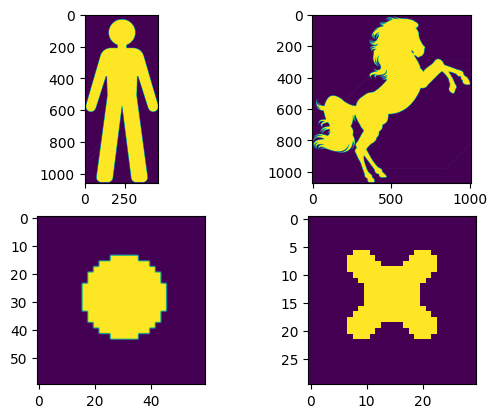

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

def load_image(path):
    image = Image.open(path)
    arr = np.asarray(image)
    return np.any(arr < 255, axis = 2)

im1 = load_image("im1.png")
im2 = load_image("im2.png")
mask1 = load_image("mask1.png")
mask2 = load_image("mask2.png")

mask1 = np.repeat(np.repeat(mask1, 2, axis = 1), 2, axis = 0)

plt.subplot(2, 2, 1)
plt.imshow(im1)
plt.subplot(2, 2, 2)
plt.imshow(im2)
plt.subplot(2, 2, 3)
plt.imshow(mask1)
plt.subplot(2, 2, 4)
plt.imshow(mask2)
plt.show()

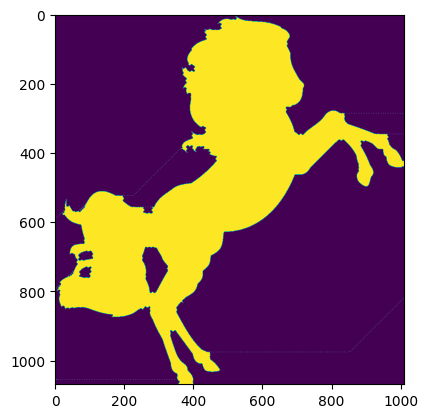

In [15]:
plt.imshow(closing(im2, mask2)); #Замыкание

Построение морфологического скелета

In [16]:
sk = build_skelet(im2, mask1)

8


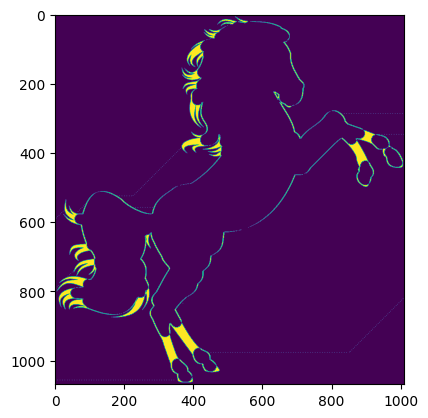

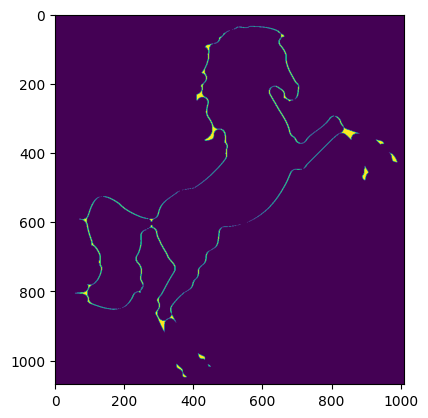

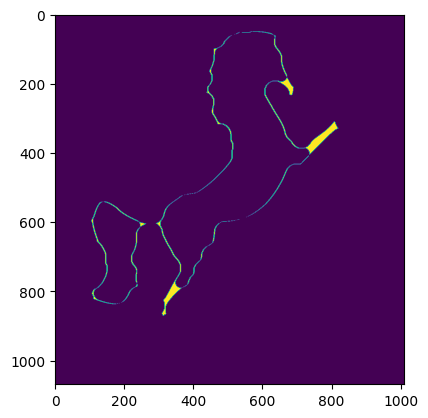

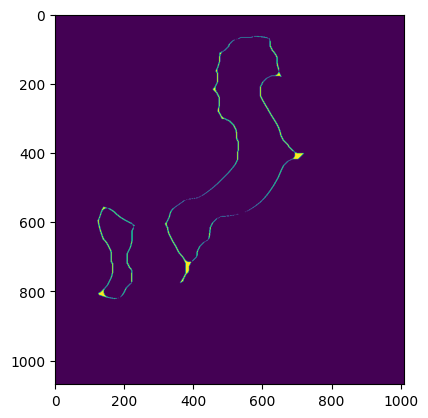

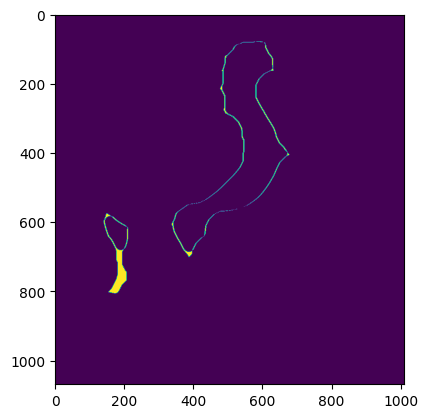

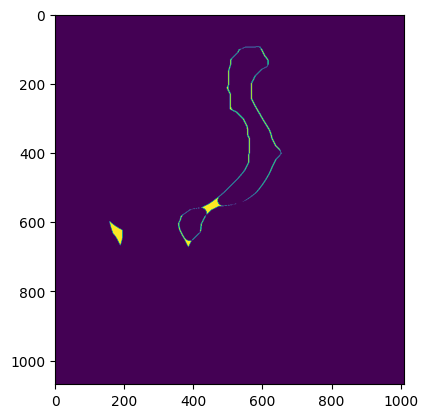

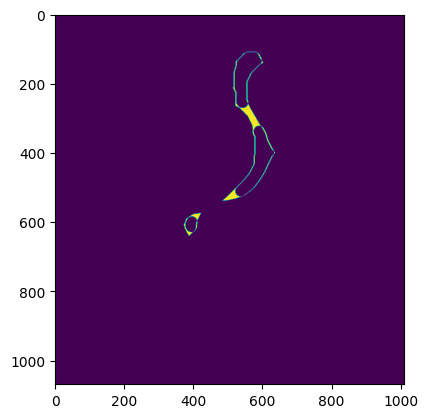

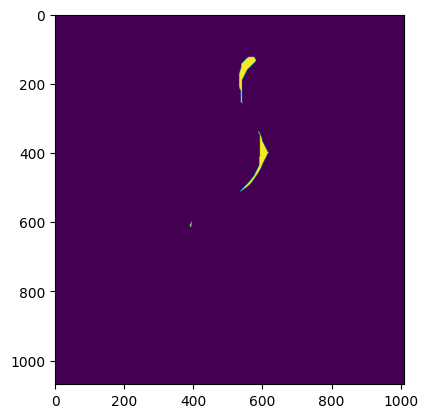

In [17]:
print(len(sk))
for s in sk:
    plt.imshow(s)
    plt.show()

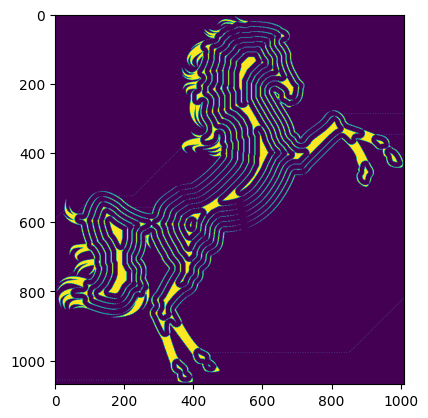

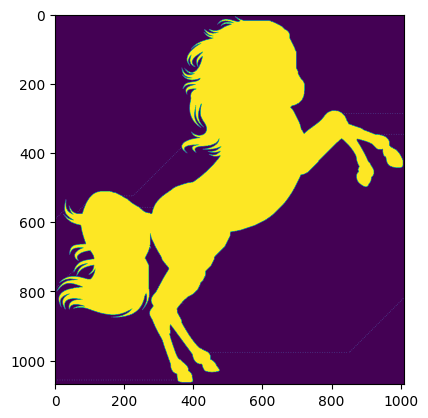

In [18]:
plt.imshow(np.any(np.array(sk), axis=0))
plt.show()

plt.imshow(reconstruct_from_skelet(sk, mask1))
plt.show()

14


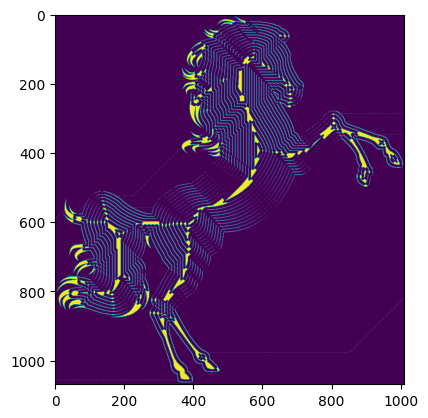

8


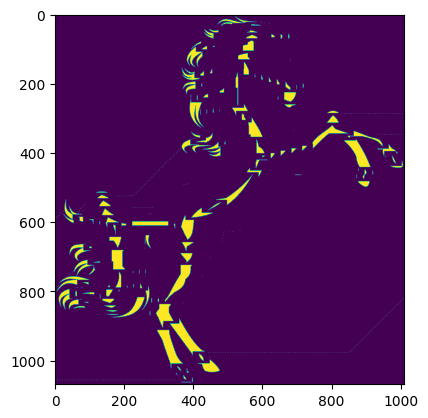

In [19]:
sk = build_skelet(im2, mask2)
print(len(sk))
plt.imshow(np.any(np.array(sk), axis=0))
plt.show()

mask3 = np.ones(shape = (15,35))
sk = build_skelet(im2, mask3)
print(len(sk))
plt.imshow(np.any(np.array(sk), axis=0))
plt.show()

Восстановление изображения

9


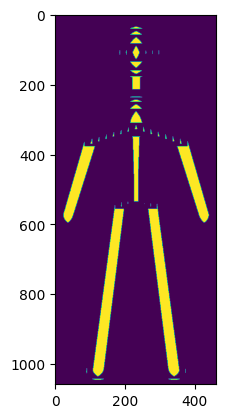

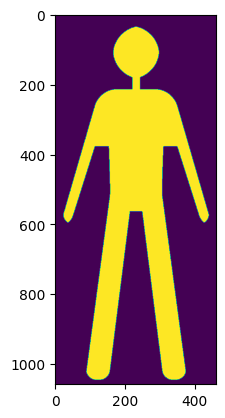

In [20]:
sk = build_skelet(im1, mask3)
print(len(sk))
plt.imshow(np.any(np.array(sk[1:]), axis=0))
plt.show()
plt.imshow(reconstruct_from_skelet(sk[1:], mask3))
plt.show()